In [47]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification, make_blobs

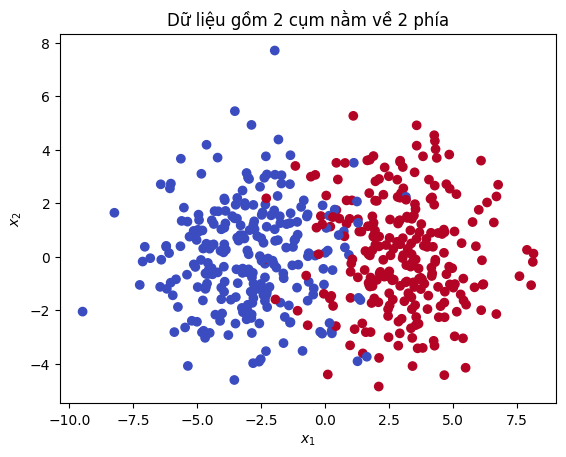

In [68]:
# Tạo dữ liệu với hai cụm nằm xa nhau
X, y = make_blobs(n_samples=500, centers=[[-3, 0], [3, 0]], cluster_std=2, random_state=42)
y[y == 0] = -1
# Vẽ dữ liệu
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title("Dữ liệu gồm 2 cụm nằm về 2 phía")
plt.show()


In [69]:
print("Features: ", X)
print("Labels: ", y)

Features:  [[ 1.95455396e+00  2.09801845e+00]
 [ 1.54572565e+00 -4.95037271e-01]
 [-4.29314577e+00 -2.16309601e+00]
 [-4.20341322e+00  3.70455637e+00]
 [ 1.27917327e+00 -7.69111088e-01]
 [ 3.34173088e+00 -3.67966673e-01]
 [ 1.88960095e+00  3.76231414e+00]
 [ 9.57534366e-01  1.41671289e+00]
 [ 2.57231091e-01 -2.76020292e+00]
 [ 1.47348169e+00 -3.60976420e+00]
 [ 3.98663580e+00  3.69672247e-01]
 [-4.67843505e+00 -6.18424752e-01]
 [ 1.92048064e+00 -1.55660945e+00]
 [ 1.96477740e+00  4.47575903e-01]
 [-3.38472193e+00  6.03094685e-01]
 [-1.41793611e+00 -1.81877491e+00]
 [-3.02699445e+00 -2.11542186e+00]
 [-4.06100230e+00 -1.15163648e+00]
 [-2.26680351e+00 -1.87975957e+00]
 [ 4.36378298e+00  3.69341465e+00]
 [-1.04976053e+00 -2.94114763e-01]
 [-2.33747314e+00  1.95109025e+00]
 [-4.96301730e+00  9.24206949e-01]
 [-4.63644137e+00  4.18477455e+00]
 [ 4.11958090e+00  2.16156145e+00]
 [-6.18885532e+00 -1.19875005e+00]
 [ 4.39391203e-01  1.74491466e+00]
 [ 3.11144982e+00  2.18838304e+00]
 [-3.9583

In [78]:
class Perceptron(object):
    def __init__(self, lr: float = 1e-5, bias: bool = True, epsilon: float = 1e-3) -> None:
        self.__lr = lr # alpha
        self.__bias = bias # bias
        self.__epsilon = epsilon # for loss if loss < epsilon return

    def __init_weights(self, shape: tuple[int]) -> None:
        # init from -5 to 5
        self.theta = 5 * (np.random.random(shape[1] + 1) * 2 - 1).reshape(-1, 1)
        if not self.__bias:
            self.theta[0, 0] = 0

    def fit(self, X: np.ndarray, y: np.ndarray, num_epochs: int = 100, trace: bool = True) -> None:
        shape = X.shape
        self.__init_weights(shape)
    
        X = np.hstack((np.ones((shape[0], 1)), X))
        for epoch in range(num_epochs):
            loss = 0
            for i in range(len(y)):
                if y[i] * (X[i] @ self.theta) <= 0:
                    loss -= y[i] * (X[i] @ self.theta)
                    self.theta += self.__lr * y[i] * X[i].reshape(-1, 1)

            if (trace):
                print(f"EPOCH {epoch + 1}/{num_epochs} Loss: {loss[0]}")


In [83]:
perceptron = Perceptron(lr=0.005, bias=True)
perceptron.fit(X, y)

EPOCH 1/100 Loss: 551.1592603765831
EPOCH 2/100 Loss: 363.4630928824527
EPOCH 3/100 Loss: 285.36479875574105
EPOCH 4/100 Loss: 240.6324779681014
EPOCH 5/100 Loss: 207.44095903659945
EPOCH 6/100 Loss: 178.4889136860107
EPOCH 7/100 Loss: 158.6353301854982
EPOCH 8/100 Loss: 142.2660003069622
EPOCH 9/100 Loss: 129.07874267730358
EPOCH 10/100 Loss: 118.89573747062398
EPOCH 11/100 Loss: 110.8589863821253
EPOCH 12/100 Loss: 105.1723398774348
EPOCH 13/100 Loss: 100.5960316376212
EPOCH 14/100 Loss: 96.03546676142496
EPOCH 15/100 Loss: 91.63498801652878
EPOCH 16/100 Loss: 87.53498163393932
EPOCH 17/100 Loss: 83.70696468275945
EPOCH 18/100 Loss: 79.8588896839013
EPOCH 19/100 Loss: 76.01081468504312
EPOCH 20/100 Loss: 72.16273968618498
EPOCH 21/100 Loss: 68.3146646873268
EPOCH 22/100 Loss: 64.46658968846862
EPOCH 23/100 Loss: 60.61851468961045
EPOCH 24/100 Loss: 56.77043969075227
EPOCH 25/100 Loss: 52.96953947866034
EPOCH 26/100 Loss: 49.137199967272835
EPOCH 27/100 Loss: 45.30486045588533
EPOCH 2

Theta:  [[-0.00329378]
 [ 0.01883513]
 [ 0.00388212]]


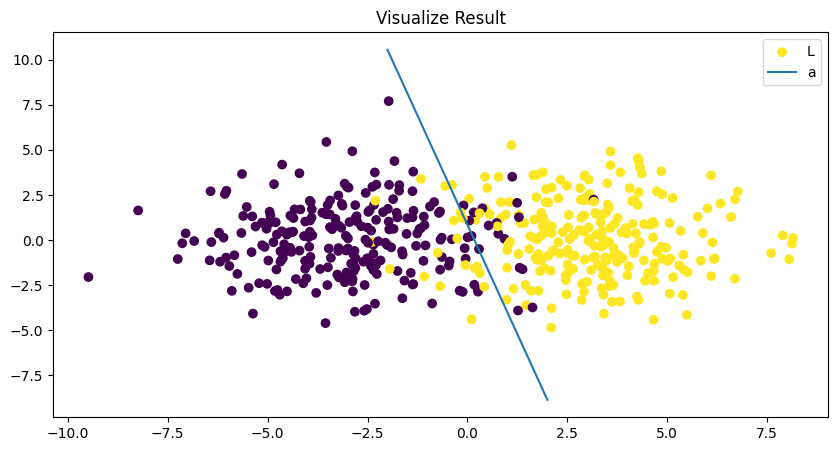

In [85]:
import matplotlib.pyplot as plt

theta = perceptron.theta
print("Theta: ", theta)
X_axis = np.linspace(-2, 2, 100)
y_axis = [
    -(theta[0] + theta[1] * x)  / theta[2]
    for x in X_axis
]

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.scatter(X[:, 0], X[:, 1], c=y)
ax.plot(X_axis, y_axis)
plt.title("Visualize Result")
plt.legend("Label")
plt.show()